In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading data

In [3]:
## it looks like the following link does not work anymore
# df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

## this is a different link to the same dataset hosted by a different site  
df = pd.read_csv('http://www.gagolewski.com/resources/data/titanic3.csv', comment='#')

In [42]:
df.shape

(1309, 14)

In [43]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [44]:
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [45]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Dimension of the disaster

In [46]:
df[df.survived==0].age.mean()

30.545363489499195

In [47]:
df[df.survived==1].age.mean()

28.91824355971897

In [48]:
df.groupby('survived').age.mean()

survived
0    30.545363
1    28.918244
Name: age, dtype: float64

In [49]:
df.groupby('survived').survived.count()

survived
0    809
1    500
Name: survived, dtype: int64

In [50]:
def g(x):
    return x/df.survived.count()

df.groupby('survived').survived.count().apply(lambda x: g(x))

survived
0    0.618029
1    0.381971
Name: survived, dtype: float64

### What about Sex vs Survived?

In [51]:
df.groupby(['survived','sex']).sex.count()

survived  sex   
0         female    127
          male      682
1         female    339
          male      161
Name: sex, dtype: int64

In [52]:
df.groupby(['survived','sex']).sex.count()

survived  sex   
0         female    127
          male      682
1         female    339
          male      161
Name: sex, dtype: int64

In [53]:
df.groupby(['survived','sex']).sex.count().unstack()

sex,female,male
survived,,
0,127,682
1,339,161


In [54]:
df.groupby(['survived','sex']).sex.count().unstack().apply(lambda x: x/float(x.sum()))

sex,female,male
survived,,
0,0.272532,0.809015
1,0.727468,0.190985


In [55]:
df.groupby(['survived','sex']).sex.count().unstack().apply(lambda x: x/float(x.sum()), axis=1)

sex,female,male
survived,,
0,0.156984,0.843016
1,0.678000,0.322000


### Social classes

In [56]:
df.groupby(['pclass']).pclass.count()

pclass
1    323
2    277
3    709
Name: pclass, dtype: int64

In [57]:
df.groupby(['pclass']).pclass.count().apply(lambda x: x/float(df.shape[0]))

pclass
1    0.246753
2    0.211612
3    0.541635
Name: pclass, dtype: float64

In [58]:
df.groupby(['survived','pclass']).pclass.count().unstack()

pclass,1,2,3
survived,,,
0,123,158,528
1,200,119,181


In [59]:
df.groupby(['survived','pclass']).pclass.count().unstack().apply(lambda x: x/float(x.sum()))

pclass,1,2,3
survived,,,
0,0.380805,0.570397,0.744711
1,0.619195,0.429603,0.255289


In [60]:
df.groupby(['survived','pclass']).pclass.count().unstack().apply(lambda x: x/float(x.sum()), axis=1)

pclass,1,2,3
survived,,,
0,0.15204,0.195303,0.652658
1,0.40000,0.238000,0.362000


In [61]:
df.groupby(['survived','sex','pclass']).pclass.count().unstack()

pclass             1    2    3
survived sex                  
0        female    5   12  110
         male    118  146  418
1        female  139   94  106
         male     61   25   75

### Age

In [62]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


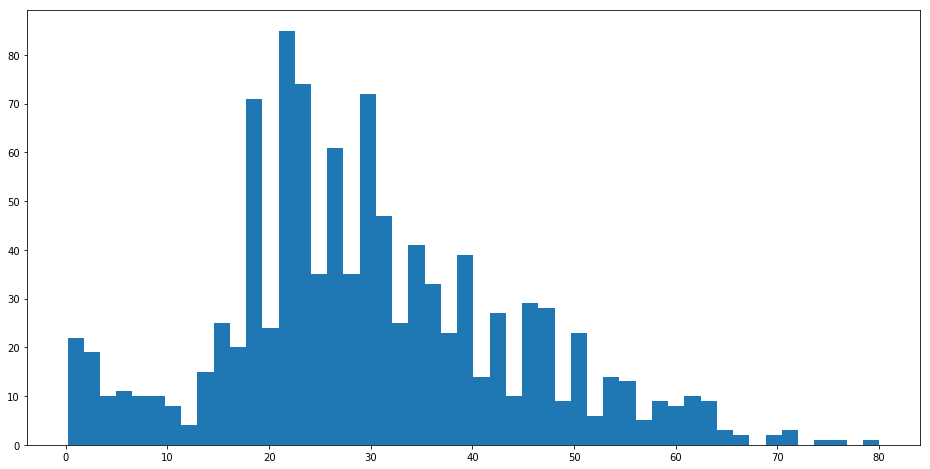

In [63]:
plt.figure(figsize=(16,8))
plt.hist(df.age.dropna(), bins=50)
plt.show()

### Age of passengers

In [64]:
plt.rcParams['figure.figsize'] = (20,8)

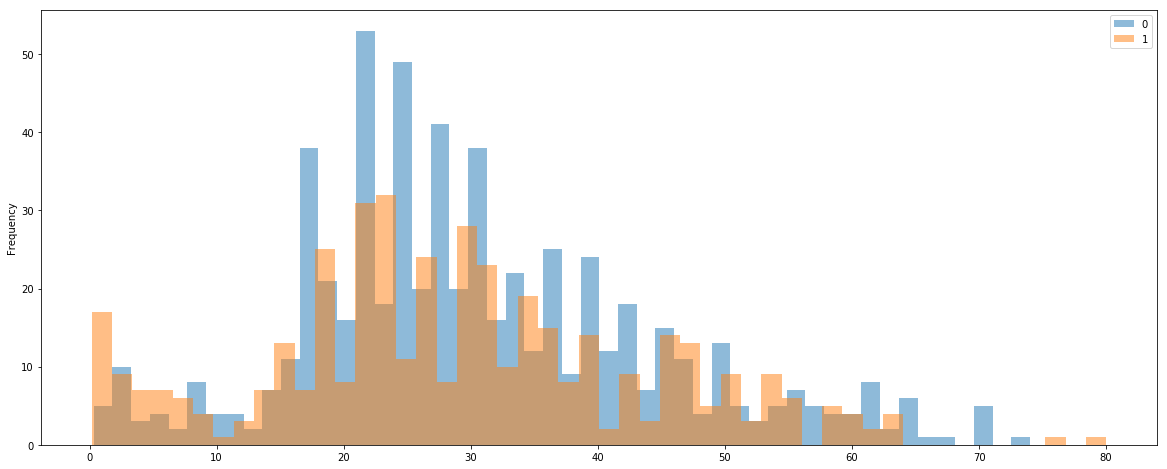

In [65]:
df.groupby(['survived']).age.plot(kind='hist', legend=True, alpha=0.5, bins=50)
plt.show()

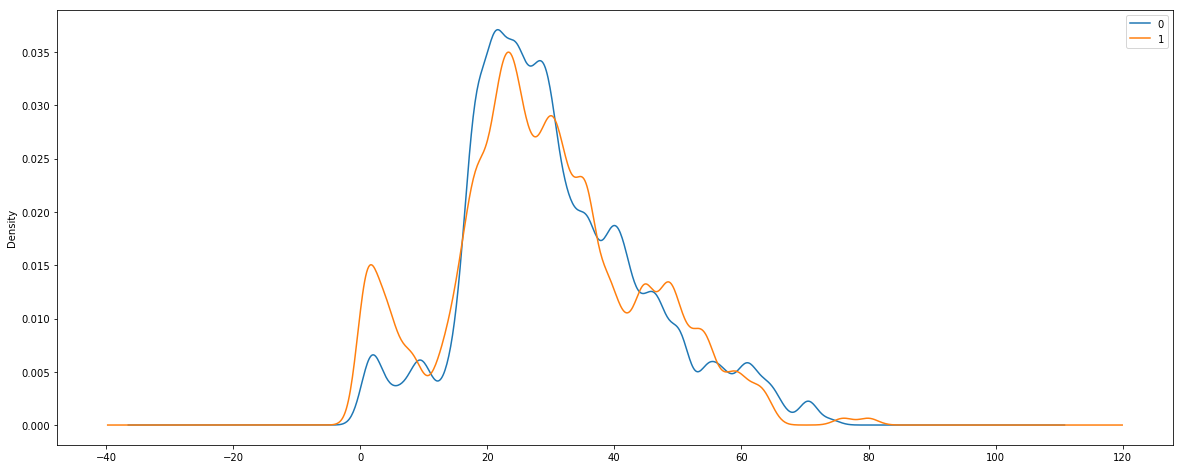

In [66]:
df.groupby(['survived']).age.plot(kind='kde', legend=True, bw_method=0.1)
plt.show()

### Age by social class

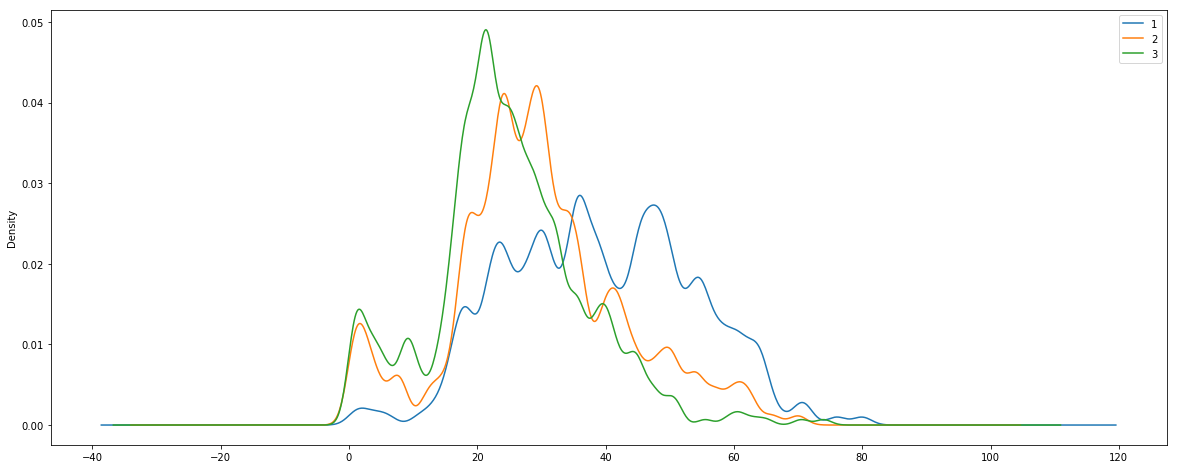

In [67]:
df.groupby(['pclass']).age.plot(kind='kde', sharex=True, legend=True, bw_method=0.1)
plt.show()

### Price / Fare

In [68]:
df.groupby(['pclass']).fare.describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


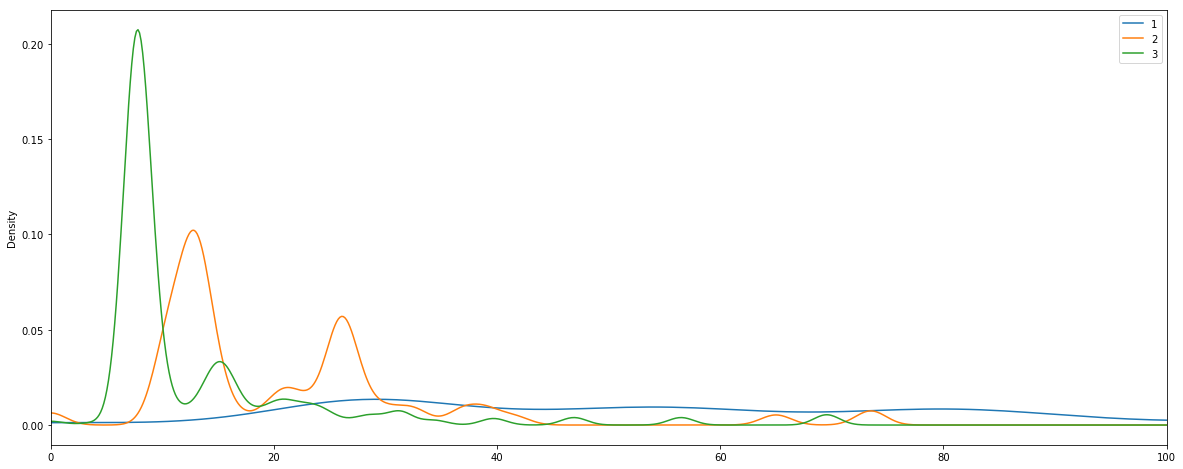

In [69]:
df.groupby(['pclass']).fare.plot(kind='kde',legend=True,sharex=True,bw_method=0.1,xlim=(0,100))
plt.show()

(1045, 14)


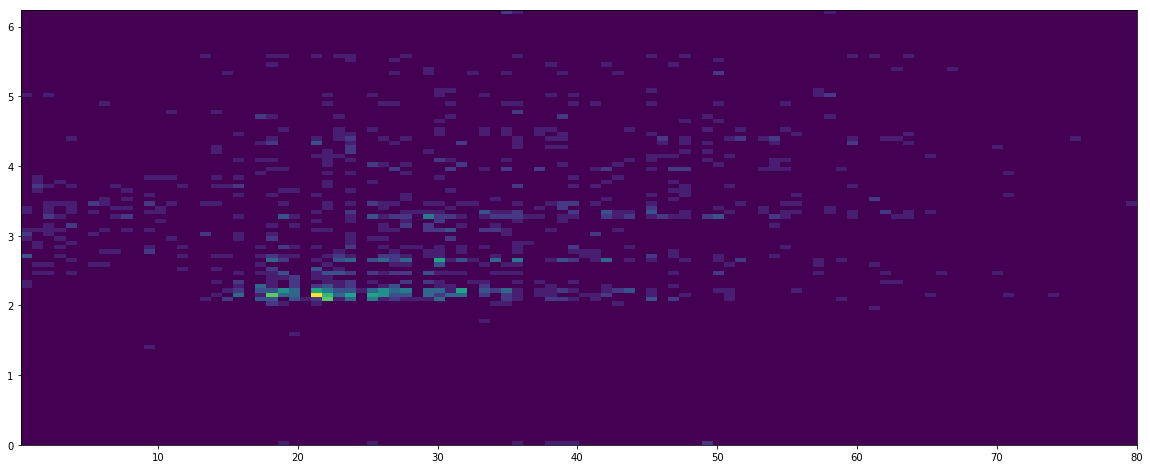

In [70]:
dfclean = df.dropna(subset=['age','fare'])
print(dfclean.shape)

plt.hist2d(dfclean.age, np.log1p(dfclean.fare), bins=100)
plt.show()

In [71]:
df.groupby(['pclass']).mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [36]:
# social class and gender distribution of the passengers who travelled along with either a sibling or a spouse
df2=df[df.sibsp!=0]
aux=df2.groupby(['pclass','sex'])[['age','sibsp']]
aux2=df.groupby(['pclass','sex'])[['age','sibsp']]
p=aux.count()['sibsp']/aux2.count()['sibsp']
print(p)

pclass  sex   
1       female    0.479167
        male      0.312849
2       female    0.433962
        male      0.286550
3       female    0.412037
        male      0.221095
Name: sibsp, dtype: float64


In [37]:
aux.describe()

age                                                        \
              count       mean        std   min    25%   50%    75%   max   
pclass sex                                                                  
1      female  63.0  38.126984  15.389033  2.00  25.00  38.0  49.50  76.0   
       male    56.0  40.695000  15.091356  0.92  29.75  42.5  50.00  70.0   
2      female  46.0  24.933043  13.745820  0.92  19.25  24.5  30.00  60.0   
       male    49.0  28.387755  15.082427  0.67  22.00  30.0  36.00  63.0   
3      female  66.0  20.154091  14.086020  0.17   9.00  19.0  30.75  48.0   
       male    81.0  18.830247  12.228286  0.75   9.00  18.0  27.00  50.0   

               sibsp                                               
               count      mean       std  min  25%  50%  75%  max  
pclass sex                                                         
1      female   69.0  1.159420  0.473510  1.0  1.0  1.0  1.0  3.0  
       male     56.0  1.089286  0.345190  1.0  1.0  1.0  1.0  3.0  
2      female   46.0  1.152174  0.419915  1.0  1.0  1.0  1.0  3.0  
       male     49.0  1.142857  0.353553  1.0  1.0  1.0  1.0  2.0  
3      female   89.0  1.921348  1.707102  1.0  1.0  1.0  2.0  8.0  
       male    109.0  2.128440  1.790411  1.0  1.0  1.0  3.0  8.0